In [1]:
# 21
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.datasets import load_iris
from sklearn.metrics import accuracy_score

iris = load_iris()
X = iris.data
y = iris.target

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

svm_classifier = SVC(random_state=42)
svm_classifier.fit(X_train, y_train)
y_pred = svm_classifier.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy of SVM Classifier on Iris dataset:", accuracy)

Accuracy of SVM Classifier on Iris dataset: 1.0


In [2]:
# 22. 
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.datasets import load_wine
from sklearn.metrics import accuracy_score

wine = load_wine()
X = wine.data
y = wine.target

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

svm_linear = SVC(kernel='linear', random_state=42)
svm_rbf = SVC(kernel='rbf', random_state=42)

svm_linear.fit(X_train, y_train)
svm_rbf.fit(X_train, y_train)

y_pred_linear = svm_linear.predict(X_test)
y_pred_rbf = svm_rbf.predict(X_test)

accuracy_linear = accuracy_score(y_test, y_pred_linear)
accuracy_rbf = accuracy_score(y_test, y_pred_rbf)

print("Accuracy of SVM with Linear kernel on Wine dataset:", accuracy_linear)
print("Accuracy of SVM with RBF kernel on Wine dataset:", accuracy_rbf)

if accuracy_linear > accuracy_rbf:
    print("Linear kernel performs better than RBF kernel on this split.")
elif accuracy_rbf > accuracy_linear:
    print("RBF kernel performs better than Linear kernel on this split.")
else:
    print("Linear and RBF kernels have the same accuracy on this split.")

Accuracy of SVM with Linear kernel on Wine dataset: 0.9814814814814815
Accuracy of SVM with RBF kernel on Wine dataset: 0.7592592592592593
Linear kernel performs better than RBF kernel on this split.


In [3]:
# 23. 
from sklearn.model_selection import train_test_split
from sklearn.svm import SVR
from sklearn.datasets import fetch_california_housing
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import StandardScaler
import numpy as np

housing = fetch_california_housing()
X = housing.data
y = housing.target

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

scaler_X = StandardScaler()
X_train_scaled = scaler_X.fit_transform(X_train)
X_test_scaled = scaler_X.transform(X_test)

scaler_y = StandardScaler()
y_train_scaled = scaler_y.fit_transform(y_train.reshape(-1, 1)).flatten()
y_test_scaled = scaler_y.transform(y_test.reshape(-1, 1)).flatten()

svr_regressor = SVR(kernel='rbf')

svr_regressor.fit(X_train_scaled, y_train_scaled)

y_pred_scaled = svr_regressor.predict(X_test_scaled)

y_pred = scaler_y.inverse_transform(y_pred_scaled.reshape(-1, 1)).flatten()
y_true = scaler_y.inverse_transform(y_test_scaled.reshape(-1, 1)).flatten()

mse = mean_squared_error(y_true, y_pred)
print("Mean Squared Error of SVR on Housing dataset:", mse)

Mean Squared Error of SVR on Housing dataset: 0.3466225578723952


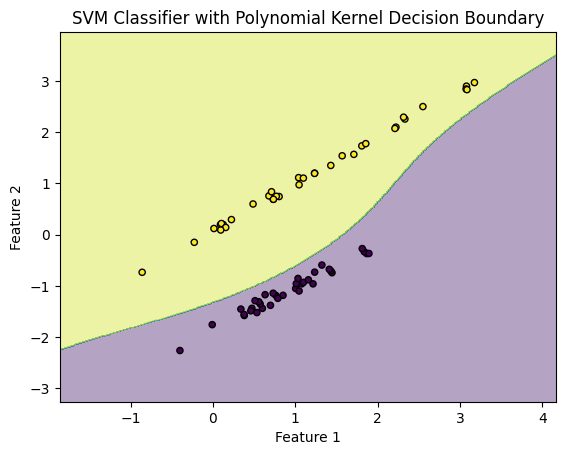

In [4]:
# 24. 
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.datasets import make_classification

X, y = make_classification(n_samples=100, n_features=2, n_informative=2, n_redundant=0,
                           n_repeated=0, n_classes=2, n_clusters_per_class=1,
                           random_state=42)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

poly_svm = SVC(kernel='poly', degree=3, C=1.0, random_state=42) 

poly_svm.fit(X_train, y_train)

x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.02),
                     np.arange(y_min, y_max, 0.02))

Z = poly_svm.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)

plt.contourf(xx, yy, Z, alpha=0.4)

plt.scatter(X_train[:, 0], X_train[:, 1], c=y_train, s=20, edgecolor='k')
plt.title('SVM Classifier with Polynomial Kernel Decision Boundary')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.show()

In [5]:
# 25
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB
from sklearn.datasets import load_breast_cancer
from sklearn.metrics import accuracy_score
breast_cancer = load_breast_cancer()
X = breast_cancer.data
y = breast_cancer.target
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)
gnb = GaussianNB()
gnb.fit(X_train, y_train)
y_pred = gnb.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy of Gaussian Naïve Bayes on Breast Cancer dataset:", accuracy)

Accuracy of Gaussian Naïve Bayes on Breast Cancer dataset: 0.9415204678362573


In [8]:
# 26.
from sklearn.datasets import fetch_20newsgroups
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score, classification_report
newsgroups = fetch_20newsgroups(subset='train', categories=['alt.atheism', 'soc.religion.christian', 'comp.graphics', 'sci.med'])
X_train, X_test, y_train, y_test = train_test_split(newsgroups.data, newsgroups.target, test_size=0.3, random_state=42)
tfidf_vectorizer = TfidfVectorizer()
X_train_tfidf = tfidf_vectorizer.fit_transform(X_train)
X_test_tfidf = tfidf_vectorizer.transform(X_test)
mnb = MultinomialNB()
mnb.fit(X_train_tfidf, y_train)
y_pred = mnb.predict(X_test_tfidf)
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy of Multinomial Naïve Bayes on 20 Newsgroups dataset:", accuracy)
print("\nClassification Report:")
print(classification_report(y_test, y_pred, target_names=newsgroups.target_names))

Accuracy of Multinomial Naïve Bayes on 20 Newsgroups dataset: 0.9262536873156342

Classification Report:
                        precision    recall  f1-score   support

           alt.atheism       1.00      0.74      0.85       129
         comp.graphics       0.98      0.96      0.97       169
               sci.med       1.00      0.95      0.98       189
soc.religion.christian       0.80      0.99      0.89       191

              accuracy                           0.93       678
             macro avg       0.95      0.91      0.92       678
          weighted avg       0.94      0.93      0.93       678



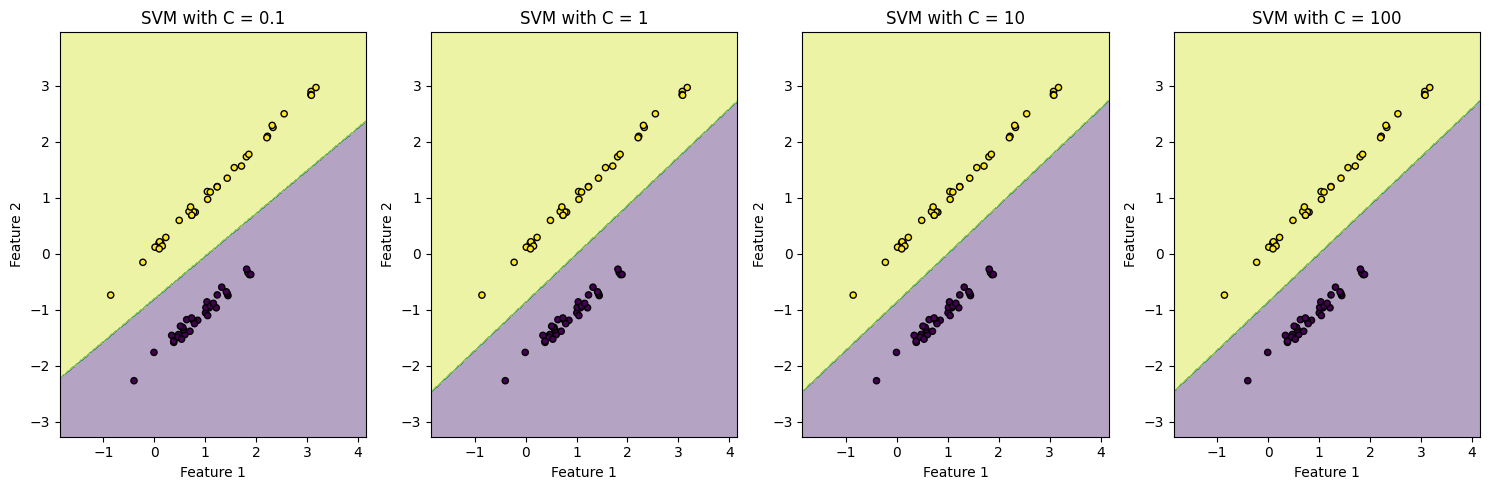

In [7]:
# 27.
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.datasets import make_classification
X, y = make_classification(n_samples=100, n_features=2, n_informative=2, n_redundant=0,
                           n_repeated=0, n_classes=2, n_clusters_per_class=1,
                           random_state=42)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)
C_values = [0.1, 1, 10, 100]
fig, axes = plt.subplots(1, len(C_values), figsize=(15, 5))

for i, C in enumerate(C_values):

    svm = SVC(kernel='linear', C=C, random_state=42)
    svm.fit(X_train, y_train)


    x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.02),
                         np.arange(y_min, y_max, 0.02))
    Z = svm.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
    axes[i].contourf(xx, yy, Z, alpha=0.4)
    axes[i].scatter(X_train[:, 0], X_train[:, 1], c=y_train, s=20, edgecolor='k')

    axes[i].set_title(f'SVM with C = {C}')
    axes[i].set_xlabel('Feature 1')
    axes[i].set_ylabel('Feature 2')

plt.tight_layout()
plt.show()

In [9]:
# 28.
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import BernoulliNB
from sklearn.metrics import accuracy_score, classification_report
from sklearn.datasets import make_classifications
X, y = make_classification(n_samples=100, n_features=10, n_informative=5, n_redundant=0,
                           random_state=42, weights=[0.5, 0.5], flip_y=0.05, n_clusters_per_class=1)
X = (X > np.median(X, axis=0)).astype(int)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)
bnb = BernoulliNB()
bnb.fit(X_train, y_train)_pred = bnb.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy of Bernoulli Naïve Bayes:", accuracy)
print("\nClassification Report:")
print(classification_report(y_test, y_pred))

SyntaxError: invalid syntax (322291645.py, line 12)

In [10]:
# 29.
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.datasets import load_iris
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import StandardScaler
iris = load_iris()
X = iris.data
y = iris.target
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)
svm_unscaled = SVC(random_state=42)
svm_unscaled.fit(X_train, y_train)
y_pred_unscaled = svm_unscaled.predict(X_test)
accuracy_unscaled = accuracy_score(y_test, y_pred_unscaled)
print("Accuracy of SVM without feature scaling:", accuracy_unscaled)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)
svm_scaled = SVC(random_state=42)
svm_scaled.fit(X_train_scaled, y_train)
y_pred_scaled = svm_scaled.predict(X_test_scaled)
accuracy_scaled = accuracy_score(y_test, y_pred_scaled)
print("Accuracy of SVM with feature scaling:", accuracy_scaled)
print("\nComparison:")
if accuracy_scaled > accuracy_unscaled:
    print("Feature scaling improved the accuracy.")
elif accuracy_scaled < accuracy_unscaled:
    print("Feature scaling decreased the accuracy (this can sometimes happen).")
else:
    print("Feature scaling did not change the accuracy.")

Accuracy of SVM without feature scaling: 1.0
Accuracy of SVM with feature scaling: 1.0

Comparison:
Feature scaling did not change the accuracy.


In [11]:
# 30. 
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB
from sklearn.datasets import load_iris
from sklearn.metrics import accuracy_score
import numpy as np

iris = load_iris()
X = iris.data
y = iris.target

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

gnb_no_smoothing = GaussianNB()
gnb_no_smoothing.fit(X_train, y_train)
y_pred_no_smoothing = gnb_no_smoothing.predict(X_test)
accuracy_no_smoothing = accuracy_score(y_test, y_pred_no_smoothing)
print("Accuracy of Gaussian Naïve Bayes without Laplace Smoothing:", accuracy_no_smoothing)

gnb_with_smoothing = GaussianNB(var_smoothing=1.0) 
gnb_with_smoothing.fit(X_train, y_train)
y_pred_with_smoothing = gnb_with_smoothing.predict(X_test)
accuracy_with_smoothing = accuracy_score(y_test, y_pred_with_smoothing)
print("Accuracy of Gaussian Naïve Bayes with Laplace Smoothing (using var_smoothing):", accuracy_with_smoothing)

print("\nComparison of Predictions (first 10 samples):")
print("Predictions without Smoothing:", y_pred_no_smoothing[:10])
print("Predictions with Smoothing:   ", y_pred_with_smoothing[:10])
print("True Labels:                ", y_test[:10])

print("\nNote:")
print("Gaussian Naïve Bayes in scikit-learn doesn't have a direct 'alpha' parameter like MultinomialNB or BernoulliNB for Laplace smoothing on counts.")
print("The `var_smoothing` parameter in `GaussianNB` addresses the issue of zero variance in features by adding a small value to the variance for stability, which has a similar effect of preventing zero probabilities in the density estimation.")

Accuracy of Gaussian Naïve Bayes without Laplace Smoothing: 0.9777777777777777
Accuracy of Gaussian Naïve Bayes with Laplace Smoothing (using var_smoothing): 0.9777777777777777

Comparison of Predictions (first 10 samples):
Predictions without Smoothing: [1 0 2 1 1 0 1 2 1 1]
Predictions with Smoothing:    [1 0 2 1 1 0 1 2 1 1]
True Labels:                 [1 0 2 1 1 0 1 2 1 1]

Note:
Gaussian Naïve Bayes in scikit-learn doesn't have a direct 'alpha' parameter like MultinomialNB or BernoulliNB for Laplace smoothing on counts.
The `var_smoothing` parameter in `GaussianNB` addresses the issue of zero variance in features by adding a small value to the variance for stability, which has a similar effect of preventing zero probabilities in the density estimation.


In [12]:
# 31. 
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.svm import SVC
from sklearn.datasets import load_iris
from sklearn.metrics import accuracy_score

iris = load_iris()
X = iris.data
y = iris.target

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

param_grid = {
    'C': [0.1, 1, 10, 100],
    'gamma': ['scale', 'auto', 0.1, 1],
    'kernel': ['linear', 'rbf', 'poly', 'sigmoid']
}

svm = SVC(random_state=42)

grid_search = GridSearchCV(svm, param_grid, cv=5, scoring='accuracy', verbose=1, n_jobs=-1)
grid_search.fit(X_train, y_train)

print("Best Hyperparameters:", grid_search.best_params_)
print("Best Accuracy:", grid_search.best_score_)

best_svm = grid_search.best_estimator_
y_pred = best_svm.predict(X_test)
test_accuracy = accuracy_score(y_test, y_pred)
print("Test Accuracy of the best model:", test_accuracy)

Fitting 5 folds for each of 64 candidates, totalling 320 fits
Best Hyperparameters: {'C': 1, 'gamma': 'scale', 'kernel': 'poly'}
Best Accuracy: 0.9714285714285715
Test Accuracy of the best model: 0.9777777777777777


In [13]:
# 32. 
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.datasets import make_classification
from sklearn.metrics import accuracy_score, classification_report

X, y = make_classification(n_classes=2, class_sep=2, weights=[0.9, 0.1],
                           n_informative=3, n_redundant=0, flip_y=0,
                           n_features=20, n_clusters_per_class=1, n_samples=1000, random_state=42)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

svm_no_weight = SVC(random_state=42)
svm_no_weight.fit(X_train, y_train)
y_pred_no_weight = svm_no_weight.predict(X_test)
accuracy_no_weight = accuracy_score(y_test, y_pred_no_weight)
print("Accuracy of SVM without class weighting:", accuracy_no_weight)
print("Classification Report without class weighting:\n", classification_report(y_test, y_pred_no_weight))

svm_with_weight = SVC(class_weight='balanced', random_state=42)
svm_with_weight.fit(X_train, y_train)
y_pred_with_weight = svm_with_weight.predict(X_test)
accuracy_with_weight = accuracy_score(y_test, y_pred_with_weight)
print("\nAccuracy of SVM with class weighting:", accuracy_with_weight)
print("Classification Report with class weighting:\n", classification_report(y_test, y_pred_with_weight))

print("\nComparison:")
if accuracy_with_weight > accuracy_no_weight:
    print("Class weighting improved the overall accuracy.")
elif accuracy_with_weight < accuracy_no_weight:
    print("Class weighting decreased the overall accuracy.")
else:
    print("Class weighting did not change the overall accuracy.")

print("\nNote: While overall accuracy might not always increase, class weighting often improves the performance on the minority class (as seen in precision, recall, and F1-score in the classification reports).")

Accuracy of SVM without class weighting: 0.9966666666666667
Classification Report without class weighting:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00       273
           1       1.00      0.96      0.98        27

    accuracy                           1.00       300
   macro avg       1.00      0.98      0.99       300
weighted avg       1.00      1.00      1.00       300


Accuracy of SVM with class weighting: 0.9966666666666667
Classification Report with class weighting:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00       273
           1       1.00      0.96      0.98        27

    accuracy                           1.00       300
   macro avg       1.00      0.98      0.99       300
weighted avg       1.00      1.00      1.00       300


Comparison:
Class weighting did not change the overall accuracy.

Note: While overall accuracy might not always increase, class weight

In [1]:
# 33.
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score, classification_report
try:
    data = pd.read_csv('spam.csv', encoding='latin-1')

    data = data[['v1', 'v2']]
    data = data.rename(columns={'v1': 'label', 'v2': 'text'})
    data['label'] = data['label'].map({'ham': 0, 'spam': 1})
except FileNotFoundError:
    print("Error: spam.csv not found. Please provide the correct file path.")
    exit()
X_train, X_test, y_train, y_test = train_test_split(data['text'], data['label'], test_size=0.3, random_state=42)
tfidf_vectorizer = TfidfVectorizer(stop_words='english')
X_train_tfidf = tfidf_vectorizer.fit_transform(X_train)
X_test_tfidf = tfidf_vectorizer.transform(X_test)
mnb = MultinomialNB()
mnb.fit(X_train_tfidf, y_train)
y_pred = mnb.predict(X_test_tfidf)
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy of Naïve Bayes for spam detection:", accuracy)
print("\nClassification Report:")
print(classification_report(y_test, y_pred))

Accuracy of Naïve Bayes for spam detection: 0.9677033492822966

Classification Report:
              precision    recall  f1-score   support

           0       0.96      1.00      0.98      1453
           1       1.00      0.75      0.86       219

    accuracy                           0.97      1672
   macro avg       0.98      0.88      0.92      1672
weighted avg       0.97      0.97      0.97      1672



In [2]:
# 34.
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.datasets import load_iris
from sklearn.metrics import accuracy_score
iris = load_iris()
X = iris.data
y = iris.target
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)
svm_classifier = SVC(random_state=42)
svm_classifier.fit(X_train, y_train)
y_pred_svm = svm_classifier.predict(X_test)
accuracy_svm = accuracy_score(y_test, y_pred_svm)
print("Accuracy of SVM Classifier:", accuracy_svm)
nb_classifier = GaussianNB()
nb_classifier.fit(X_train, y_train)
y_pred_nb = nb_classifier.predict(X_test)
accuracy_nb = accuracy_score(y_test, y_pred_nb)
print("Accuracy of Naïve Bayes Classifier:", accuracy_nb)
print("\nComparison:")
if accuracy_svm > accuracy_nb:
    print("SVM Classifier performed better than Naïve Bayes.")
elif accuracy_nb > accuracy_svm:
    print("Naïve Bayes Classifier performed better than SVM.")
else:
    print("SVM Classifier and Naïve Bayes Classifier have the same accuracy.")

Accuracy of SVM Classifier: 1.0
Accuracy of Naïve Bayes Classifier: 0.9777777777777777

Comparison:
SVM Classifier performed better than Naïve Bayes.


In [3]:
# 35.
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB
from sklearn.datasets import load_breast_cancer
from sklearn.metrics import accuracy_score
from sklearn.feature_selection import SelectKBest, f_classif

breast_cancer = load_breast_cancer()

In [4]:
# 36.
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.datasets import load_wine
from sklearn.metrics import accuracy_score
from sklearn.multiclass import OneVsRestClassifier, OneVsOneClassifier
wine = load_wine()
X = wine.data
y = wine.target
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)
ovr_svm = OneVsRestClassifier(SVC(random_state=42))
ovr_svm.fit(X_train, y_train)
y_pred_ovr = ovr_svm.predict(X_test)
accuracy_ovr = accuracy_score(y_test, y_pred_ovr)
print("Accuracy of SVM with One-vs-Rest (OvR):", accuracy_ovr)
ovo_svm = OneVsOneClassifier(SVC(random_state=42))
ovo_svm.fit(X_train, y_train)
y_pred_ovo = ovo_svm.predict(X_test)
accuracy_ovo = accuracy_score(y_test, y_pred_ovo)
print("Accuracy of SVM with One-vs-One (OvO):", accuracy_ovo)
print("\nComparison:")
if accuracy_ovr > accuracy_ovo:
    print("One-vs-Rest performed better than One-vs-One.")
elif accuracy_ovo > accuracy_ovr:
    print("One-vs-One performed better than One-vs-Rest.")
else:
    print("One-vs-Rest and One-vs-One achieved the same accuracy.")

Accuracy of SVM with One-vs-Rest (OvR): 0.7222222222222222
Accuracy of SVM with One-vs-One (OvO): 0.7962962962962963

Comparison:
One-vs-One performed better than One-vs-Rest.


In [5]:
# 37.
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.datasets import load_breast_cancer
from sklearn.metrics import accuracy_score

breast_cancer = load_breast_cancer()
X = breast_cancer.data
y = breast_cancer.target

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

svm_linear = SVC(kernel='linear', random_state=42)
svm_linear.fit(X_train, y_train)
y_pred_linear = svm_linear.predict(X_test)
accuracy_linear = accuracy_score(y_test, y_pred_linear)
print("Accuracy of SVM with Linear kernel:", accuracy_linear)

svm_poly = SVC(kernel='poly', degree=3, random_state=42)  
svm_poly.fit(X_train, y_train)
y_pred_poly = svm_poly.predict(X_test)
accuracy_poly = accuracy_score(y_test, y_pred_poly)
print("Accuracy of SVM with Polynomial kernel:", accuracy_poly)

svm_rbf = SVC(kernel='rbf', random_state=42)
svm_rbf.fit(X_train, y_train)
y_pred_rbf = svm_rbf.predict(X_test)
accuracy_rbf = accuracy_score(y_test, y_pred_rbf)
print("Accuracy of SVM with RBF kernel:", accuracy_rbf)

print("\nComparison of Accuracies:")
print(f"Linear Kernel: {accuracy_linear:.4f}")
print(f"Polynomial Kernel: {accuracy_poly:.4f}")
print(f"RBF Kernel: {accuracy_rbf:.4f}")

Accuracy of SVM with Linear kernel: 0.9649122807017544
Accuracy of SVM with Polynomial kernel: 0.9415204678362573
Accuracy of SVM with RBF kernel: 0.935672514619883

Comparison of Accuracies:
Linear Kernel: 0.9649
Polynomial Kernel: 0.9415
RBF Kernel: 0.9357


In [6]:
# 38. 
from sklearn.model_selection import StratifiedKFold
from sklearn.svm import SVC
from sklearn.datasets import load_iris
from sklearn.metrics import accuracy_score
import numpy as np

iris = load_iris()
X = iris.data
y = iris.target

n_folds = 5
skf = StratifiedKFold(n_splits=n_folds, shuffle=True, random_state=42)

svm_classifier = SVC(random_state=42)

accuracy_scores = []

for train_index, test_index in skf.split(X, y):
    X_train, X_test = X[train_index], X[test_index]
    y_train, y_test = y[train_index], y[test_index]

    svm_classifier.fit(X_train, y_train)
    y_pred = svm_classifier.predict(X_test)

    accuracy = accuracy_score(y_test, y_pred)
    accuracy_scores.append(accuracy)

average_accuracy = np.mean(accuracy_scores)
print(f"Accuracy scores for each fold: {accuracy_scores}")
print(f"Average accuracy using Stratified {n_folds}-Fold Cross-Validation:", average_accuracy)

Accuracy scores for each fold: [1.0, 0.9666666666666667, 0.9333333333333333, 1.0, 0.9333333333333333]
Average accuracy using Stratified 5-Fold Cross-Validation: 0.9666666666666668


In [7]:
# 39. 
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB
from sklearn.datasets import load_iris
from sklearn.metrics import accuracy_score

iris = load_iris()
X = iris.data
y = iris.target

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

priors_list = [
    None, 
    [0.1, 0.45, 0.45],
    [0.5, 0.3, 0.2],
    [0.33, 0.33, 0.34] 
]

print("Comparing Gaussian Naïve Bayes with different prior probabilities:\n")

for priors in priors_list:
   
    gnb = GaussianNB(priors=priors)
    gnb.fit(X_train, y_train)
    y_pred = gnb.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)

    prior_str = "Uniform" if priors is None else str([f"{p:.2f}" for p in priors])
    print(f"Priors: {prior_str}, Accuracy: {accuracy:.4f}")

Comparing Gaussian Naïve Bayes with different prior probabilities:

Priors: Uniform, Accuracy: 0.9778
Priors: ['0.10', '0.45', '0.45'], Accuracy: 0.9778
Priors: ['0.50', '0.30', '0.20'], Accuracy: 1.0000
Priors: ['0.33', '0.33', '0.34'], Accuracy: 0.9778


In [8]:
# 40. 
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.datasets import load_breast_cancer
from sklearn.metrics import accuracy_score
from sklearn.feature_selection import RFE

breast_cancer = load_breast_cancer()
X = breast_cancer.data
y = breast_cancer.target

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

svm_baseline = SVC(random_state=42)
svm_baseline.fit(X_train, y_train)
y_pred_baseline = svm_baseline.predict(X_test)
accuracy_baseline = accuracy_score(y_test, y_pred_baseline)
print("Accuracy of SVM without RFE:", accuracy_baseline)

estimator = SVC(kernel="linear", random_state=42) 
selector = RFE(estimator, n_features_to_select=10, step=1)
selector.fit(X_train, y_train)

selected_features_indices = selector.support_
print("Selected feature indices:", selected_features_indices)

X_train_selected = X_train[:, selected_features_indices]
X_test_selected = X_test[:, selected_features_indices]

svm_rfe = SVC(random_state=42)
svm_rfe.fit(X_train_selected, y_train)
y_pred_rfe = svm_rfe.predict(X_test_selected)
accuracy_rfe = accuracy_score(y_test, y_pred_rfe)
print("Accuracy of SVM with RFE (top 10 features):", accuracy_rfe)

print("\nComparison:")
if accuracy_rfe > accuracy_baseline:
    print("RFE improved the accuracy.")
elif accuracy_rfe < accuracy_baseline:
    print("RFE decreased the accuracy.")
else:
    print("RFE did not change the accuracy.")

Accuracy of SVM without RFE: 0.935672514619883
Selected feature indices: [ True False False False False False  True  True False False  True  True
 False False False False False False False False False False False False
  True  True  True  True  True False]
Accuracy of SVM with RFE (top 10 features): 0.9064327485380117

Comparison:
RFE decreased the accuracy.


In [9]:
# 41. 
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.datasets import load_breast_cancer
from sklearn.metrics import precision_score, recall_score, f1_score, classification_report

breast_cancer = load_breast_cancer()
X = breast_cancer.data
y = breast_cancer.target

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

svm_classifier = SVC(random_state=42)
svm_classifier.fit(X_train, y_train)
y_pred = svm_classifier.predict(X_test)

precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

print("Performance of SVM Classifier:")
print(f"Precision: {precision:.4f}")
print(f"Recall: {recall:.4f}")
print(f"F1-Score: {f1:.4f}")

print("\nClassification Report:")
print(classification_report(y_test, y_pred))

Performance of SVM Classifier:
Precision: 0.9076
Recall: 1.0000
F1-Score: 0.9515

Classification Report:
              precision    recall  f1-score   support

           0       1.00      0.83      0.90        63
           1       0.91      1.00      0.95       108

    accuracy                           0.94       171
   macro avg       0.95      0.91      0.93       171
weighted avg       0.94      0.94      0.93       171



In [10]:
# 42.
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB
from sklearn.datasets import load_iris
from sklearn.metrics import log_loss

iris = load_iris()
X = iris.data
y = iris.target

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

nb_classifier = GaussianNB()
nb_classifier.fit(X_train, y_train)

y_prob = nb_classifier.predict_proba(X_test)

logloss = log_loss(y_test, y_prob)
print("Log Loss (Cross-Entropy Loss) of Naïve Bayes Classifier:", logloss)

Log Loss (Cross-Entropy Loss) of Naïve Bayes Classifier: 0.04896447467183247


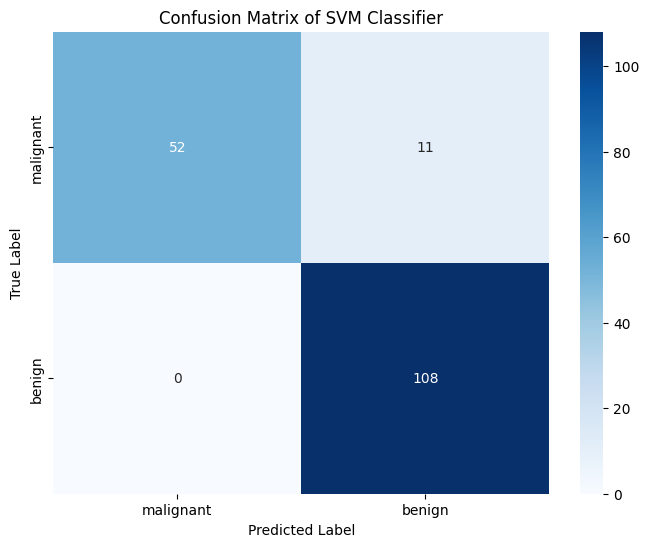

In [11]:
# 43.
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.datasets import load_breast_cancer
from sklearn.metrics import confusion_matrix

breast_cancer = load_breast_cancer()
X = breast_cancer.data
y = breast_cancer.target

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

svm_classifier = SVC(random_state=42)
svm_classifier.fit(X_train, y_train)
y_pred = svm_classifier.predict(X_test)

cm = confusion_matrix(y_test, y_pred)

plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=breast_cancer.target_names, yticklabels=breast_cancer.target_names)
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix of SVM Classifier')
plt.show()

In [12]:
# 44.
from sklearn.model_selection import train_test_split
from sklearn.svm import SVR
from sklearn.datasets import fetch_california_housing
from sklearn.metrics import mean_absolute_error
from sklearn.preprocessing import StandardScaler

housing = fetch_california_housing()
X = housing.data
y = housing.target

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

scaler_X = StandardScaler()
X_train_scaled = scaler_X.fit_transform(X_train)
X_test_scaled = scaler_X.transform(X_test)

svr_regressor = SVR(kernel='rbf')
svr_regressor.fit(X_train_scaled, y_train)

y_pred_scaled = svr_regressor.predict(X_test_scaled)


mae = mean_absolute_error(y_test, svr_regressor.predict(X_test_scaled))
print("Mean Absolute Error (MAE) of SVR:", mae)

Mean Absolute Error (MAE) of SVR: 0.3972059291578808


In [13]:
#45
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB
from sklearn.datasets import load_breast_cancer
from sklearn.metrics import roc_auc_score

breast_cancer = load_breast_cancer()
X = breast_cancer.data
y = breast_cancer.target

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

nb_classifier = GaussianNB()
nb_classifier.fit(X_train, y_train)

y_prob = nb_classifier.predict_proba(X_test)[:, 1]

roc_auc = roc_auc_score(y_test, y_prob)
print("ROC-AUC Score of Naïve Bayes Classifier:", roc_auc)

ROC-AUC Score of Naïve Bayes Classifier: 0.9922104644326867


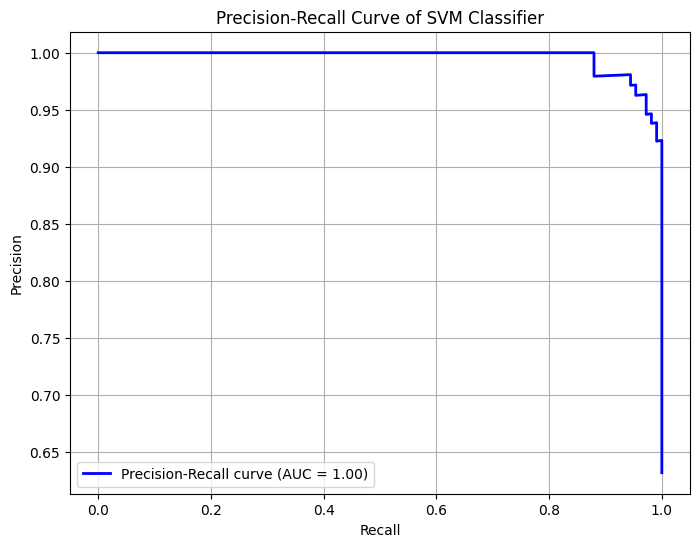

In [14]:
#46
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.datasets import load_breast_cancer
from sklearn.metrics import precision_recall_curve, auc

breast_cancer = load_breast_cancer()
X = breast_cancer.data
y = breast_cancer.target

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

svm_classifier = SVC(probability=True, random_state=42)
svm_classifier.fit(X_train, y_train)

y_prob = svm_classifier.predict_proba(X_test)[:, 1]

precision, recall, thresholds = precision_recall_curve(y_test, y_prob)

pr_auc = auc(recall, precision)

plt.figure(figsize=(8, 6))
plt.plot(recall, precision, color='b', lw=2, label=f'Precision-Recall curve (AUC = {pr_auc:.2f})')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve of SVM Classifier')
plt.legend(loc='lower left')
plt.grid(True)
plt.show()